# matplotlib绘图

matplotlib概念上分为：
1. pylab快速绘图：提供了类似matlab中的快速方便的交互式绘图函数；（不是本文介绍的重点）
    > 其本身什么也没有做，仅仅导入了大量像numpy、pyplot等非常实用的库，当然它的代价就是速度比较慢
2. 脚本层：pyplot等大量matplotlib API；（本文重点）
3. 绘图元素层：提供了绘图元素和图形语法，通过面向对象的方式来构建图形；（本文重点）
4. 后端层：
    > backend_bases.FigureCanvas：图形的绘制领域
    
    > backend_bases.Renderer：知道如何在FigureCanvas上如何绘制

## 绘图元素层
### 绘图元素
    > artist.Artist：所有绘图元素的基类，该基类提供了绘图元素的基本属性，并提供了以obj.get\_系列函数来获取属性、obj.set\_系列函数来设置属性、setp(obj, '属性'， 值)、getp(obj)获取obj所有属性，getp(obj, '属性')获取指定属性。各绘图元素除了Artist共有的属性外，还带有自己特有的属性。
    
|artist通用属性| 属性用途|
|--------------|---------|
|alpha | 透明度，值在0到1之间，0为完全透明，1为完全不透明 |
|animated | 布尔值，在绘制动画效果时使用 |
|axes | 此Artist对象所在的Axes对象，可能为None |
|clip_box | 对象的裁剪框 |
|clip_on | 是否裁剪 |
|clip_path | 裁剪的路径 |
|contains | 判断指定点是否在对象上的函数 |
|figure | 所在的Figure对象，可能为None |
|label | 文本标签 |
|picker | 控制Artist对象选取 |
|transform | 控制偏移旋转 |
|visible | 是否可见 |
|zorder | 控制绘图顺序 |
|agg_filter|unknown|
|gid|	an id string|
|path_effects|	unknown|
|rasterized|True、False、None|
|sketch_params|	unknown|
|snap|	unknown|
|url|	a url string|

|Axes新增artist属性	|属性描述|
|-------------------|--------|
|adjustable	|‘box’、‘datalim’、‘box-forced’|
|anchor|	unknown|
|aspect|	unknown|
|autoscale_on|	unknown|
|autoscalex_on|	unknown|
|autoscaley_on|	unknown|
|axes_locator|	unknown|
|axis_bgcolor|	any matplotlib color - see colors()|
|axisbelow|	True 、False|
|color_cycle|	unknown|
|figure|	unknown|
|frame_on|	True、False|
|navigate|  True、False|
|navigate_mode|	unknown|
|position|	unknown|
|rasterization_zorder|	unknown|
|title|	unknown|
|xbound|	unknown|
|xlabel|	unknown|
|xlim|	length 2 sequence of floats|
|xmargin|	unknown|
|xscale|‘linear’、‘log’、‘logit’、‘symlog’|
|xticklabels|	sequence of strings|
|xticks|	sequence of floats|
|ybound|	unknown|
|ylabel|	unknown|
|ylim|	length 2 sequence of floats|
|ymargin|	unknown|
|yscale|‘linear’、‘log’、‘logit’、‘symlog’|
|yticklabels|	sequence of strings|
|yticks|	sequence of floats|
    
    > 图形语法：如果说artist.Artist，表明了绘图元素及属性的继承关系，则图形语法表明了绘图元素的拓扑结构；绘图元素可分为简单类型和容器类型。简单类型的Artists绘图元素，例如Line2D、 Rectangle、 Text、AxesImage 等等。而容器类型则可以包含許多简单类型的Artists，使它們组织成一個整体，例如Axis、 Axes、Figure等。绘图元素，除了set\_和get\_及属性之外（从artist.Artist继承，包括自己定义的），还包括一系列添加其他绘图元素的函数，还有管理这些绘图元素的数据结构。

    
|Axes创建绘图元素方法	|被创建的绘图元素	|管理绘图元素的属性|
|----|--------|----|
|annotate	|Annotate	|texts|
|bars	|Rectangle	|patches|
|errorbar	|Line2D, Rectangle	|lines,patches|
|fill	|Polygon	|patches|
|hist	|Rectangle	|patches|
|imshow	|AxesImage	|images|
|legend	|Legend	|legends|
|plot	|Line2D	|lines|
|scatter	|PolygonCollection	|Collections|
|text	|Text	|texts|

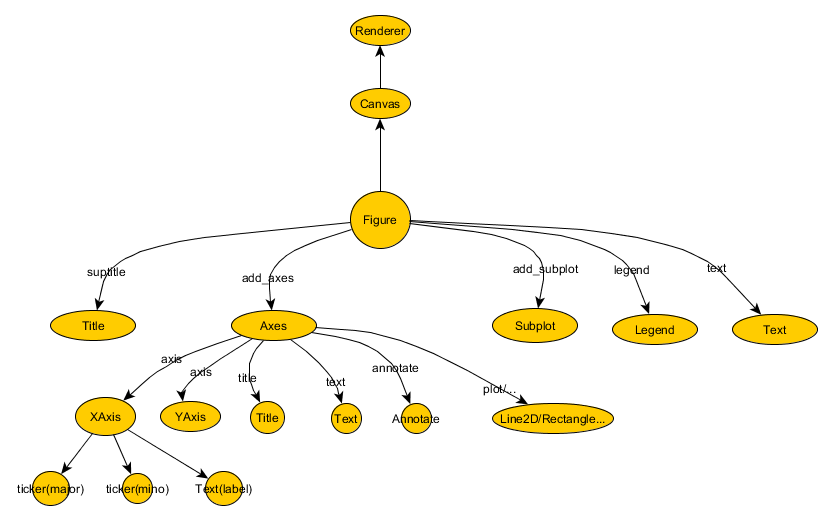

In [1]:
from IPython.display import Image
Image(filename=u"..\images\matplotlib绘图元素拓扑结构.png")

### 图形语法
    图形元素包括：figure绘图对象（容器）、Axes子图、Subplot子区，类似R中分面
    Axes or Subplot又包括：XAxis/YAxis坐标系统、title子图标题、text子图文字、annotate注解等
    坐标系统又包括：tick刻度、tick lable刻度注释、xlabel/ylabel轴标题

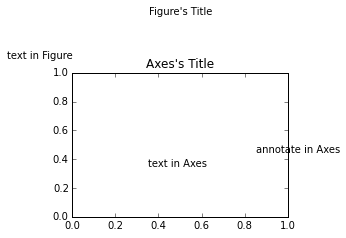

In [74]:
from matplotlib.pylab import *
                                                 
fig = figure()                                   #-创建figure绘图对象（容器）
fig.suptitle(u"Figure's Title")                      #在figure绘图对象中创建了“文本绘图元素”，因此len(fig.texts) => 1
fig.text(x=.1, y=.8, s='text in Figure')             #创建Text文本对象
ax = Axes(fig, [.25, .25, .5, .5])                   #-创建Axes子图
ax.set_title("Axes's Title")                             #此处title作为属性，而不是绘图对象，因此还是len(ax.texts) => 0
ax.text(x=0.35, y=0.35, s='text in Axes')                #在Axes子图中创建了“文本绘图元素”，对应Text对象，len(ax.texts) => 1
ax.annotate('annotate in Axes', (.85, .45))              #在Axes子图中创建了“注释绘图元素”，对应Text对象，len(ax.texts) => 2

fig.add_axes(ax)

## 脚本层

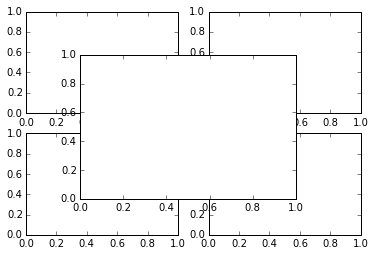

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure()
plt.subplot(221)
plt.subplot(222)
plt.subplot(223)
plt.subplot(224)
plt.axes([.25,.25,.5,.5])

??figure函数用于创建Figure对象

|参数	|默认值	|描述|
|----|--------|----|
|num	|1	|图像的数量|
|figsize	|figure.figsize	|图像的长和宽（英寸）|
|dpi	|figure.dpi	|分辨率（点/英寸）|
|facecolor	|figure.facecolor	|绘图区域的背景颜色|
|edgecolor	figure.e|dgecolor	|绘图区域边缘的颜色|
|frameon	|True	|是否绘制图像边缘|

## matplotlib配置文件

In [3]:
%matplotlib inline
import matplotlib as plt
plt.matplotlib_fname()

u'd:\\python27\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

## 动态配置

In [4]:
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
mpl.rc('lines', linewidth=2, color='r') #或者

## 创建绘图对象（容器）

In [5]:
#例1
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()       #创建第一个绘图对象
plt.figure(2)      #创建第二个绘图对象
plt.figure(3)      #创建第三个绘图对象
plt.figure(5)      #创建第四个绘图对象
plt.figure()       #创建第五绘图对象
print plt.get_fignums()  #返回对象个数
plt.gcf()          #f返回当前绘图对象，这里指向第一个

[1, 2, 3, 5, 6]


## 创建子图和子区

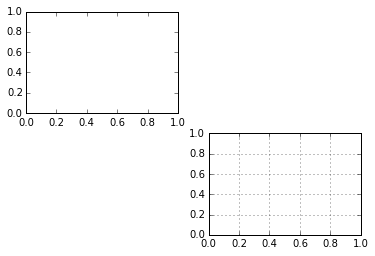

In [6]:
#例1
plt.subplot(221)   #创建2x2格子1子区，默认创建绘图对象
plt.subplot(224)   #创建2x2格子4子区，在已有绘图对象中
plt.grid()         #当前子区中创建网格

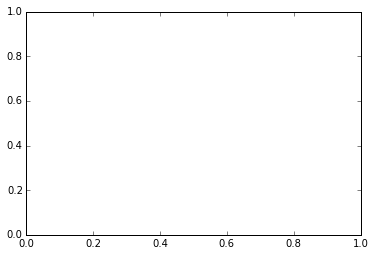

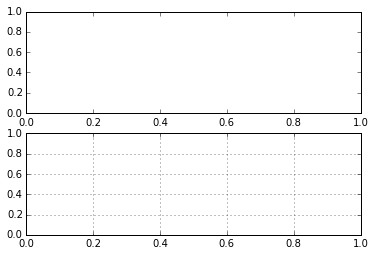

In [7]:
#例2
plt.subplots()      #创建1个子区，默认创建绘图对象
plt.subplots(2)     #创建2个子区，同时创建新的绘图对象，注意与subplot区别
plt.grid()          #当前子区中创建网格

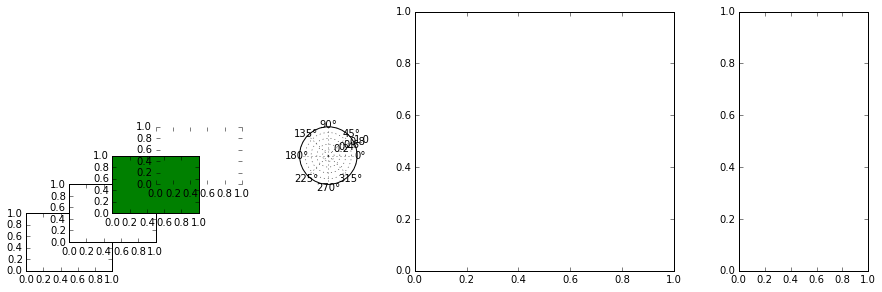

In [8]:
#例3
plt.axes([.65, .6, .2, .2])  #默认创建绘图对象，创建子图,[left, bottom, width, height]
plt.axes([.75, .7, .2, .2])  #相同绘图对象中，再次创建子图
plt.axes([.85, .8, .2, .2], axisbg='g')           #属性，设置背景色
plt.axes([.95, .9, .2, .2], frameon=False)        #属性，不显示外框
plt.axes([1.25, .9, .2, .2], polar=True)          #属性，极坐标
plt.axes([1.55, .6, .6, .9], aspect='equal')      #属性，y/x比例，equal、auto、number
plt.axes([2.15, .6, .6, .9], aspect=2)            #属性，y/x比例，2

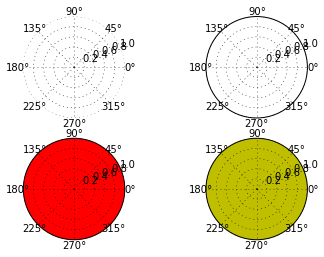

In [9]:
#例4
plt.subplot(221,frameon=False,aspect=2,polar=True,axisbg='g')  #axes属性，同样适用于subplot,但不适用于subplots
plt.subplot(222,frameon=True,aspect=2,polar=True,axisbg='w')
plt.subplot(223,frameon=True,aspect=2,polar=True,axisbg='r')
plt.subplot(224,frameon=True,aspect=2,polar=True,axisbg='y')

## 快速绘图函数 - plot

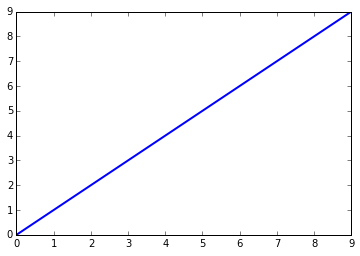

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(np.arange(10))

## 图类型
## 直方图（又称柱状图）

(array([  2.,   1.,   4.,  10.,   4.,   7.,   9.,   4.,  11.,   5.,   9.,
          5.,   4.,   2.,   5.,   7.,   3.,   4.,   0.,   0.,   1.,   1.,
          0.,   0.,   2.]),
 array([-2.12277085, -1.91167089, -1.70057092, -1.48947096, -1.27837099,
        -1.06727103, -0.85617106, -0.6450711 , -0.43397114, -0.22287117,
        -0.01177121,  0.19932876,  0.41042872,  0.62152869,  0.83262865,
         1.04372861,  1.25482858,  1.46592854,  1.67702851,  1.88812847,
         2.09922844,  2.3103284 ,  2.52142836,  2.73252833,  2.94362829,
         3.15472826]),
 <a list of 25 Patch objects>)

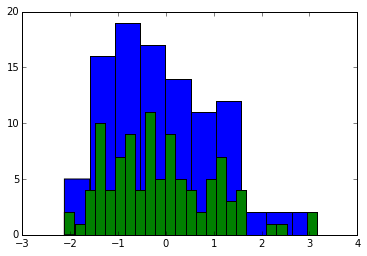

In [11]:
import matplotlib.pyplot as plt
import numpy as np
y = np.random.randn(100)
plt.hist(y, 10)
plt.hist(y, 25)

## 直条图（又称条形图）

<Container object of 3 artists>

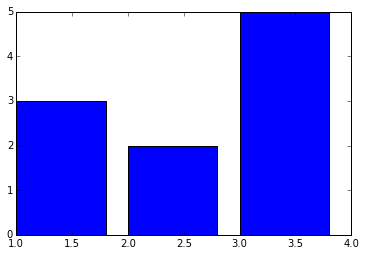

In [12]:
plt.bar([1, 2, 3], [3, 2, 5])

## 饼状图

([<matplotlib.patches.Wedge at 0x5c06f70>,
  <matplotlib.text.Text at 0x60ff190>])

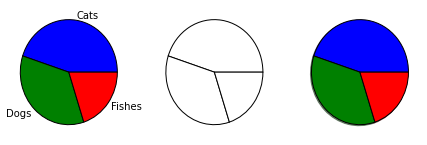

In [13]:
x = [45, 35, 20]                    #比例
plt.figure(figsize=(10,8))
plt.subplot(341)
labels = ['Cats', 'Dogs', 'Fishes']
plt.pie(x, labels=labels)              #属性，标签
plt.subplot(342)
plt.pie(x, colors=['w','w','w'])       #属性，颜色
plt.subplot(343)
plt.pie(x, shadow=True)                #属性，阴影，不明显

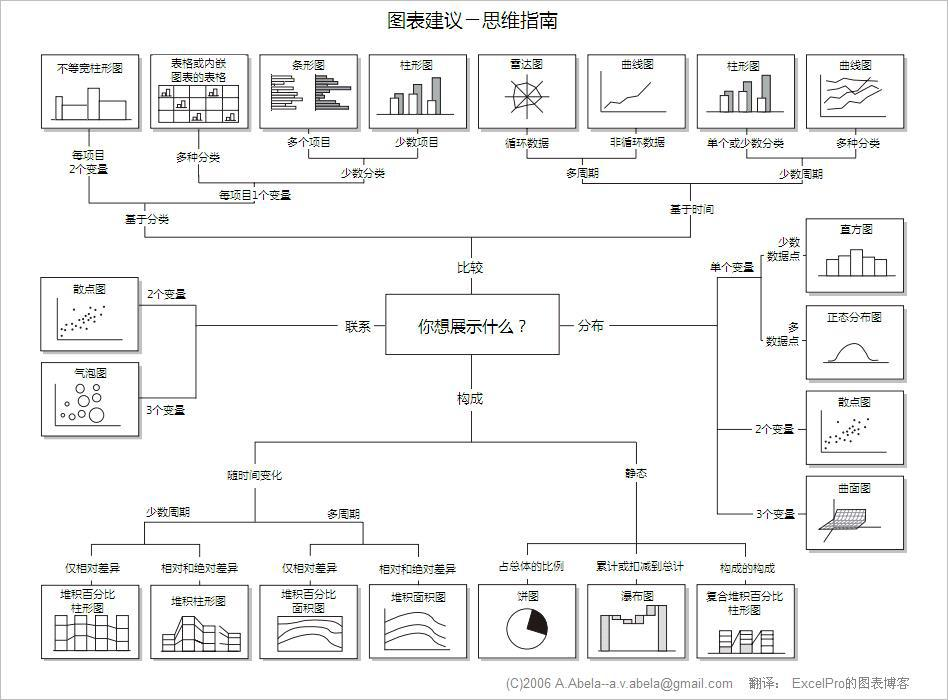

In [14]:
from IPython.display import Image
Image(filename=u"..\images\图标建议.jpg")